In [1]:
from diagrams import Diagram, Cluster, Node, Edge
from diagrams.generic.compute import Rack
from diagrams.custom import Custom as CustomNode

In [2]:
class Custom(Node):
    _type = "custom"
    _icon_dir = None

    fontcolor = "#ffffff"
    _provider = "custom"
 
    def _load_icon(self):
        return self._icon

    def __init__(self, label, icon_path, **attrs):
        self._icon = icon_path
        super().__init__(label, **attrs)
        
class CondaNode(Custom):
    def __init__(self, label, icon_path='./conda.svg', **attrs):
        
        attrs.update({'width': '0.75', 'height': '0.75', 'labelloc': 't'})
        
        super().__init__(f'\n\n\n\n{label}', icon_path, **attrs)

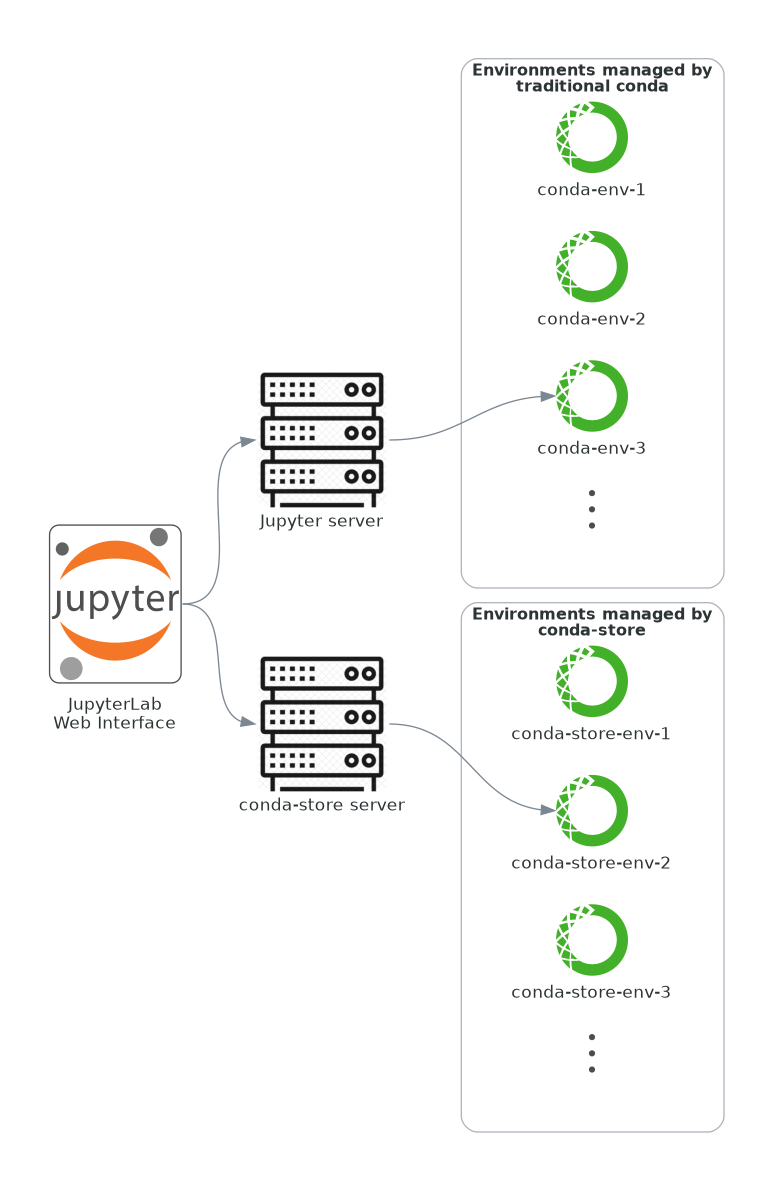

In [5]:
graph_attr = {
    "margin": "-1.5, -1.5",
    "concentrate": "true",
    "splines":  "spline",
    "bgcolor": "transparent",
}
with Diagram(show=False, direction="LR", graph_attr=graph_attr, filename='gator-conda-store', outformat='pdf') as diag:
    jlfe = Custom(label='\nJupyterLab\nWeb Interface', icon_path='./Jupyter_logo.svg')
    jls = Rack('Jupyter server')
    cs = Rack('conda-store server')

    with Cluster('<<b>Environments managed by<br />conda-store</b>>', graph_attr={'bgcolor': 'transparent'}):
        CondaNode(label='conda-store-env-1')
        condas_cs = CondaNode(label='conda-store-env-2')
        CondaNode(label='conda-store-env-3')
        Custom('', './ellipsis.svg', width='0.4', height='0.4')
        Node("", shape="plaintext", height="0.0", width="0.0")

    with Cluster('<<b>Environments managed by<br />traditional conda</b>>', graph_attr={'bgcolor': 'transparent'}):
        CondaNode(label='conda-env-1')
        CondaNode(label='conda-env-2')
        condas_c = CondaNode(label='conda-env-3')
        Custom('', './ellipsis.svg', width='0.4', height='0.4')
        Node("", shape="plaintext", height="0.0", width="0.0")

    jlfe - Edge(tailport='e', headport='w') >> jls
    jlfe - Edge(tailport='e', headport='w') >> cs

    jls - Edge(tailport='e', headport='w') >> condas_c
    cs - Edge(tailport='e', headport='w') >> condas_cs

diag